In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [8]:
with open('../dataframes/df_with_libs.p','rb') as read_file:
    df = pickle.load(read_file)
    
#This census block's Total Pop was in error (Over 9000)
df = df[df['CENSUS BLOCK']!=8435001023]
list(df)

['CENSUS BLOCK',
 'TOTAL POPULATION',
 'bus_within_001',
 'cof_within_001',
 'closest_el',
 'dist_to_closest_el',
 'daily_rides_closest_el',
 'best_shops_under_001',
 'block_lat',
 'block_lon',
 'crime_count',
 'dist_to_closest_library']

In [3]:
from sklearn.cluster import MeanShift, estimate_bandwidth


In [22]:
X = df.drop(columns=['CENSUS BLOCK', 'closest_el', 'daily_rides_closest_el','block_lat', 'block_lon', 'best_shops_under_001'])

In [30]:
# X = StandardScaler().fit_transform(X)
# estimate bandwidth 
bandwidth = estimate_bandwidth(X, quantile=.7, n_samples=500)


In [31]:
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

number of estimated clusters : 7


In [32]:
np.unique(labels)

array([0, 1, 2, 3, 4, 5, 6])

In [33]:
X = df.drop(columns=['CENSUS BLOCK', 'closest_el', 'daily_rides_closest_el','block_lat', 'block_lon', 'best_shops_under_001'])
X = StandardScaler().fit_transform(X)

pca = PCA(n_components = 2)
pca_result = pca.fit_transform(X)
pca_one = pca_result[:,0]
pca_two = pca_result[:,1]

df_mean = df
df_mean['mean_labs'] = ms.labels_
df_mean['pca_one'] = pca_one
df_mean['pca_two'] = pca_two

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


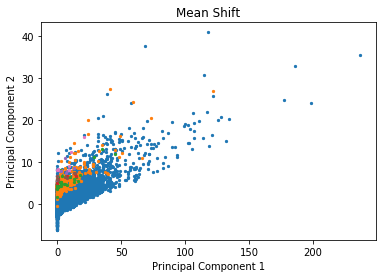

In [37]:
labels = np.unique(ms.labels_)

for dblabel in np.unique(labels):
    df_for_plot = df_mean[df_mean.mean_labs == dblabel]
    df_pca_one = df_for_plot.pca_one
    df_pca_two = df_for_plot.pca_two
    bus = df_for_plot.bus_within_001
    plt.scatter(bus, df_pca_one, s=5, label=dblabel)

plt.title('Mean Shift')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.savefig("MeanShiftp7.svg")

In [92]:
df_mean[df_mean.mean_labs==13].describe()

,CENSUS BLOCK,TOTAL POPULATION,bus_within_001,cof_within_001,dist_to_closest_el,daily_rides_closest_el,best_shops_under_001,block_lat,block_lon,crime_count,dist_to_closest_library,mean_labs,pca_one,pca_two
count,1.800000e+01,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.0,18.000000,18.000000
mean,2.609283e+09,533.722222,23.666667,1.000000,0.010491,5220.849921,0.055556,41.895134,-87.634103,12.777778,0.011047,13.0,475.713642,23.515488
std,2.913501e+09,26.775330,29.387873,1.328422,0.009747,2543.056498,0.235702,0.052224,0.029850,16.264561,0.004470,0.0,26.750159,29.822273
min,1.040030e+08,511.000000,0.000000,0.000000,0.001055,337.524862,0.000000,41.788840,-87.728590,0.000000,0.002700,13.0,453.013999,-2.550996
25%,8.132538e+08,518.000000,6.750000,0.000000,0.003552,4666.969162,0.000000,41.884839,-87.640184,1.500000,0.008011,13.0,459.974355,5.628495
50%,8.165015e+08,525.500000,13.000000,1.000000,0.007790,5148.823320,0.000000,41.891862,-87.628853,8.500000,0.010236,13.0,467.578361,15.548375
75%,3.729751e+09,538.250000,24.750000,1.000000,0.015272,7548.750730,0.000000,41.897902,-87.621839,17.250000,0.013986,13.0,480.224279,33.103665
max,8.391001e+09,623.000000,122.000000,5.000000,0.033502,8050.059081,1.000000,41.999398,-87.590754,64.000000,0.018413,13.0,564.903250,120.732462


In [61]:
#High pop, high bus, hi crime
df_mean[df_mean.mean_labs==13].describe()

,CENSUS BLOCK,TOTAL POPULATION,bus_within_001,cof_within_001,dist_to_closest_el,daily_rides_closest_el,best_shops_under_001,block_lat,block_lon,crime_count,dist_to_closest_library,mean_labs,pca_one,pca_two
count,4.000000e+01,40.00000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.0,40.000000,40.000000
mean,2.701707e+09,334.72500,14.650000,0.425000,0.015611,4718.828739,0.050000,41.877906,-87.637349,12.500000,0.008908,13.0,4.240300,-0.609059
std,2.452025e+09,82.93556,16.535199,0.500641,0.017841,2725.312312,0.220721,0.073845,0.045351,3.644455,0.004765,0.0,1.146720,1.635900
min,3.010220e+08,152.00000,0.000000,0.000000,0.001107,695.176471,0.000000,41.673299,-87.764936,6.000000,0.003047,13.0,1.956793,-3.117487
25%,8.037518e+08,271.00000,1.750000,0.000000,0.003616,2498.320601,0.000000,41.857526,-87.652593,10.000000,0.005475,13.0,3.329599,-2.022307
50%,2.517003e+09,343.50000,10.000000,0.000000,0.009607,4865.041910,0.000000,41.893724,-87.630316,12.500000,0.007771,13.0,4.098776,-0.899857
75%,4.157006e+09,383.25000,21.000000,1.000000,0.015498,6600.007061,0.000000,41.913267,-87.619480,15.000000,0.010498,13.0,4.713676,0.663607
max,8.331001e+09,479.00000,66.000000,1.000000,0.070705,10624.839242,1.000000,41.994130,-87.560434,21.000000,0.023051,13.0,7.183930,2.831812


In [55]:
#Interesting, high pop low bus
df_mean[df_mean.mean_labs==7].describe()

,CENSUS BLOCK,TOTAL POPULATION,bus_within_001,cof_within_001,dist_to_closest_el,daily_rides_closest_el,best_shops_under_001,block_lat,block_lon,crime_count,dist_to_closest_library,mean_labs,pca_one,pca_two
count,2.350000e+02,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.0,235.000000,235.000000
mean,2.292247e+09,502.740426,5.140426,0.153191,0.010832,3925.293538,0.012766,41.912922,-87.645371,2.531915,0.009801,7.0,2.764474,-3.441900
std,2.677888e+09,90.585870,7.459969,0.360941,0.007974,2420.657302,0.112503,0.060980,0.032603,2.589022,0.004958,0.0,1.025833,1.180389
min,1.020120e+08,288.000000,0.000000,0.000000,0.000726,337.524862,0.000000,41.724745,-87.810356,0.000000,0.001269,7.0,0.993974,-5.982102
25%,6.035015e+08,435.000000,0.000000,0.000000,0.004871,2105.551772,0.000000,41.870848,-87.655444,0.000000,0.005968,7.0,2.065824,-4.125590
50%,8.120120e+08,490.000000,2.000000,0.000000,0.008518,3845.434789,0.000000,41.912290,-87.643006,2.000000,0.009314,7.0,2.533434,-3.484104
75%,3.302002e+09,567.500000,6.000000,0.000000,0.014918,4934.492180,0.000000,41.963794,-87.626357,4.000000,0.013037,7.0,3.273753,-3.125643
max,8.423002e+09,805.000000,51.000000,1.000000,0.044381,10624.839242,1.000000,42.017242,-87.585910,11.000000,0.026122,7.0,6.875787,0.664396


In [52]:
#Interesting but high crime
df_mean[df_mean.mean_labs==4].describe()

,CENSUS BLOCK,TOTAL POPULATION,bus_within_001,cof_within_001,dist_to_closest_el,daily_rides_closest_el,best_shops_under_001,block_lat,block_lon,crime_count,dist_to_closest_library,mean_labs,pca_one,pca_two
count,1.660000e+02,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.0,166.000000,166.000000
mean,4.118058e+09,17.777108,25.228916,0.427711,0.012784,4315.935523,0.042169,41.867499,-87.655723,19.602410,0.010851,4.0,4.133737,2.588919
std,3.052795e+09,33.609951,27.226914,0.496244,0.010517,3114.049780,0.201582,0.061173,0.042425,4.443421,0.005377,0.0,1.428006,1.267879
min,1.010020e+08,0.000000,0.000000,0.000000,0.000417,337.524862,0.000000,41.691882,-87.756473,13.000000,0.001603,4.0,1.882176,0.489813
25%,8.172520e+08,0.000000,6.000000,0.000000,0.004201,1151.314667,0.000000,41.860778,-87.681397,17.000000,0.006866,4.0,3.007281,1.608562
50%,3.201002e+09,0.000000,16.000000,0.000000,0.010907,4449.553645,0.000000,41.882527,-87.634162,19.000000,0.010275,4.0,3.636842,2.185620
75%,8.313751e+09,21.750000,36.000000,1.000000,0.019595,6487.262606,0.000000,41.895243,-87.626186,21.750000,0.014248,4.0,5.023476,3.698408
max,8.436001e+09,213.000000,128.000000,1.000000,0.053442,13972.553730,1.000000,42.022159,-87.572747,34.000000,0.026606,4.0,7.720595,5.499208


In [67]:
df_mean.to_csv('data/df_mean_stand_48_clust.csv')

## Drop Business

In [36]:
X = df.drop(columns=['CENSUS BLOCK', 'closest_el', 'daily_rides_closest_el',
                     'block_lat', 'block_lon', 'best_shops_under_001',
                    'bus_within_001'])
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)


number of estimated clusters : 12


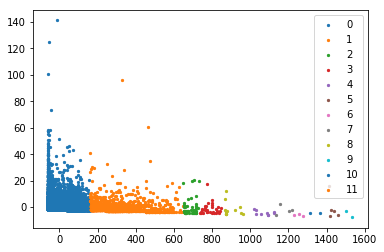

In [39]:
pca = PCA(n_components = 2)
pca_result = pca.fit_transform(X)
pca_one = pca_result[:,0]
pca_two = pca_result[:,1]

df_mean = df
df_mean['mean_labs'] = ms.labels_
df_mean['pca_one'] = pca_one
df_mean['pca_two'] = pca_two

labels = np.unique(ms.labels_)

for dblabel in np.unique(labels):
    df_for_plot = df_mean[df_mean.mean_labs == dblabel]
    df_pca_one = df_for_plot.pca_one
    df_pca_two = df_for_plot.pca_two
    bus = df_for_plot.cof_within_001
    plt.scatter(df_pca_one, df_pca_two, s=5, label=dblabel)
plt.legend()